# Confusion Matrix

In [1]:
from google.colab import files

uploaded = files.upload()

Saving heart.xlsx to heart.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('heart.xlsx')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [6]:
df.shape

(299, 13)

In [7]:
df.DEATH_EVENT.value_counts()

,count
DEATH_EVENT,
0,203
1,96


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

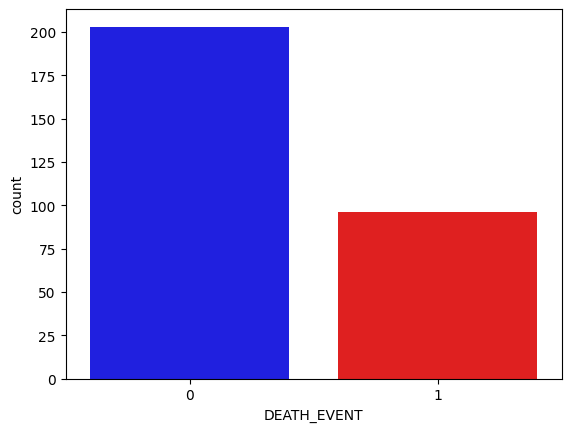

In [8]:
sns.countplot(x='DEATH_EVENT',data=df,palette=['blue', 'red'])

<Axes: xlabel='diabetes', ylabel='count'>

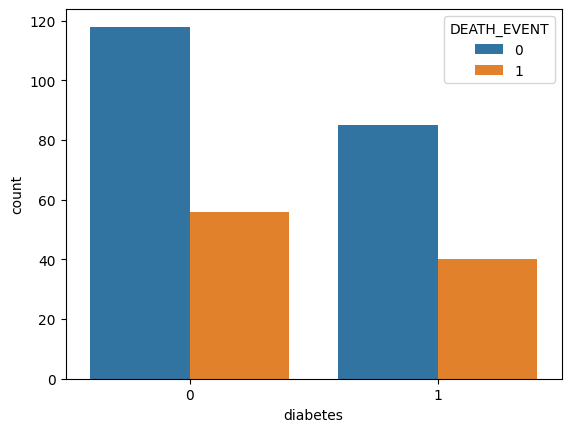

In [9]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

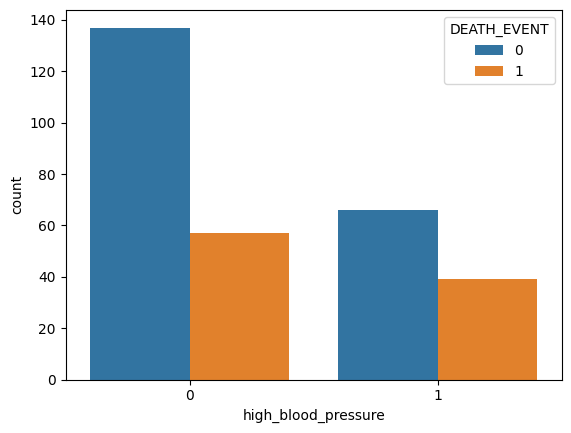

In [10]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=df)

In [11]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


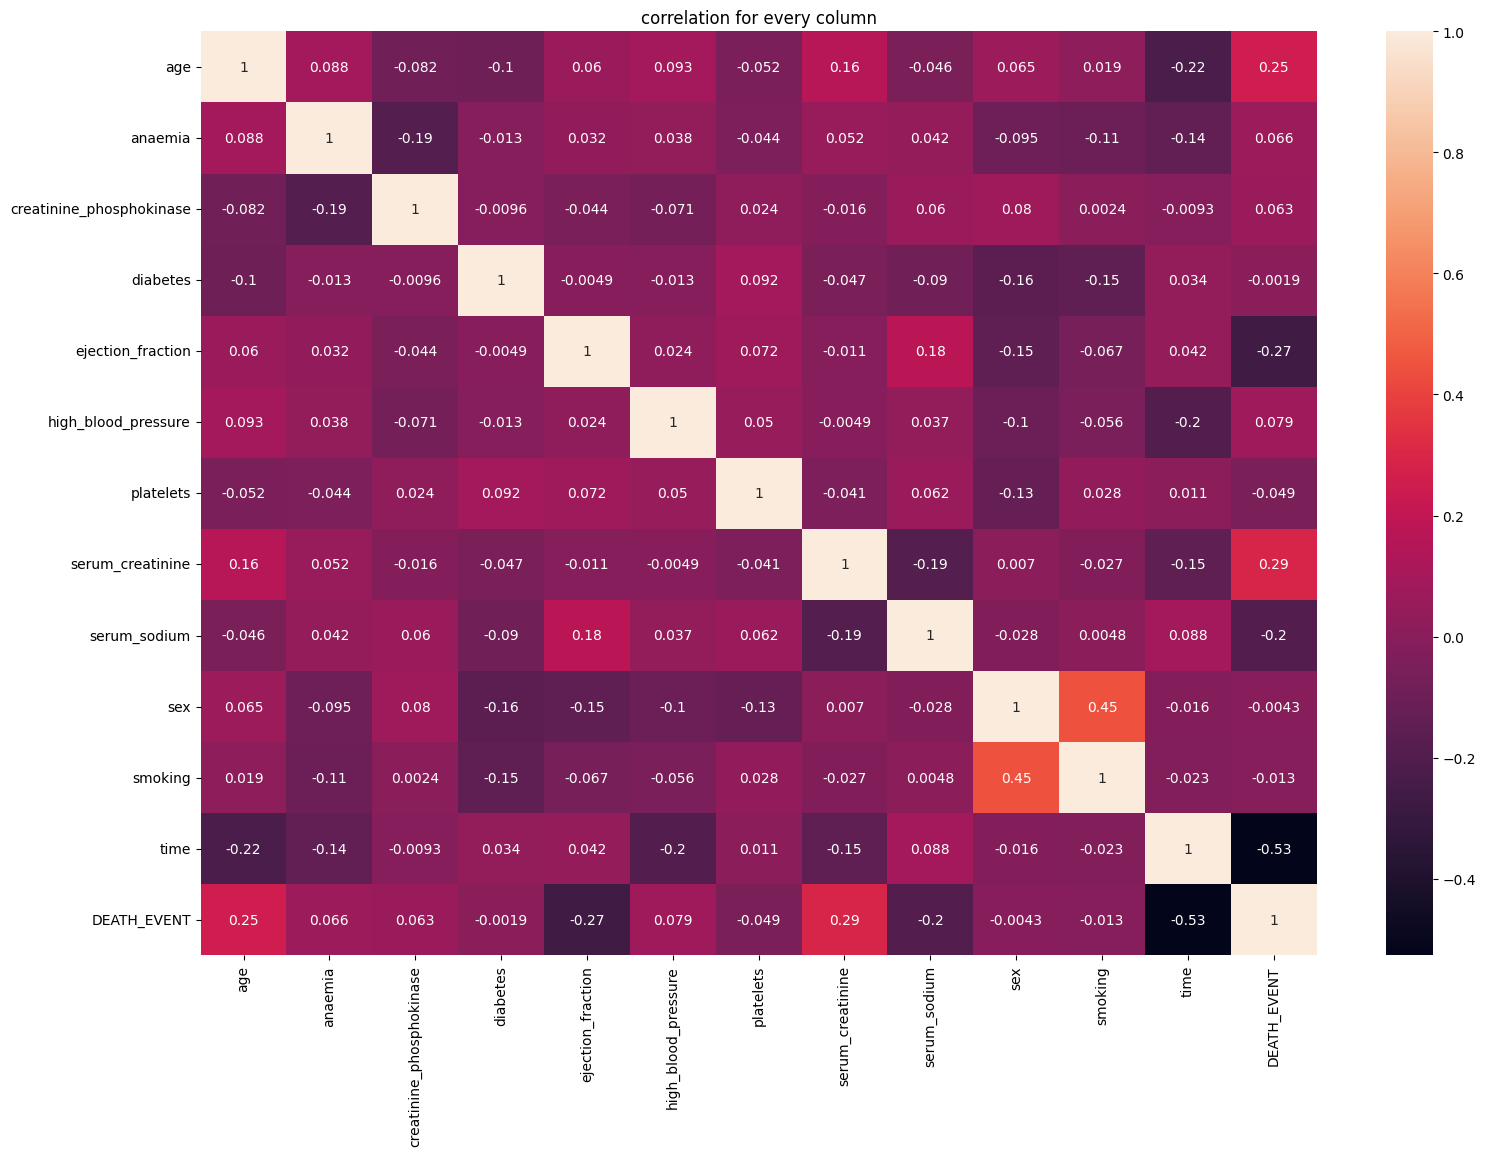

In [12]:
plt.figure(figsize=(18,12))
plt.title('correlation for every column')
sns.heatmap(df.corr(),annot=True)
plt.savefig("heatmap.png")

# Separate X,Y

In [13]:
x=df.drop('DEATH_EVENT',axis=1)
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [14]:
y=df[['DEATH_EVENT']]
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


# TrainSet & TestSet Separate

In [15]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=42)

In [16]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [17]:
ytrain.head()

,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1


In [18]:
xtrain.shape

(209, 12)

In [19]:
ytrain.shape

(209, 1)

In [20]:
xtest.shape

(90, 12)

In [21]:
ytest.shape

(90, 1)

# Decision Tree

In [22]:
dt=DecisionTreeClassifier()

In [23]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

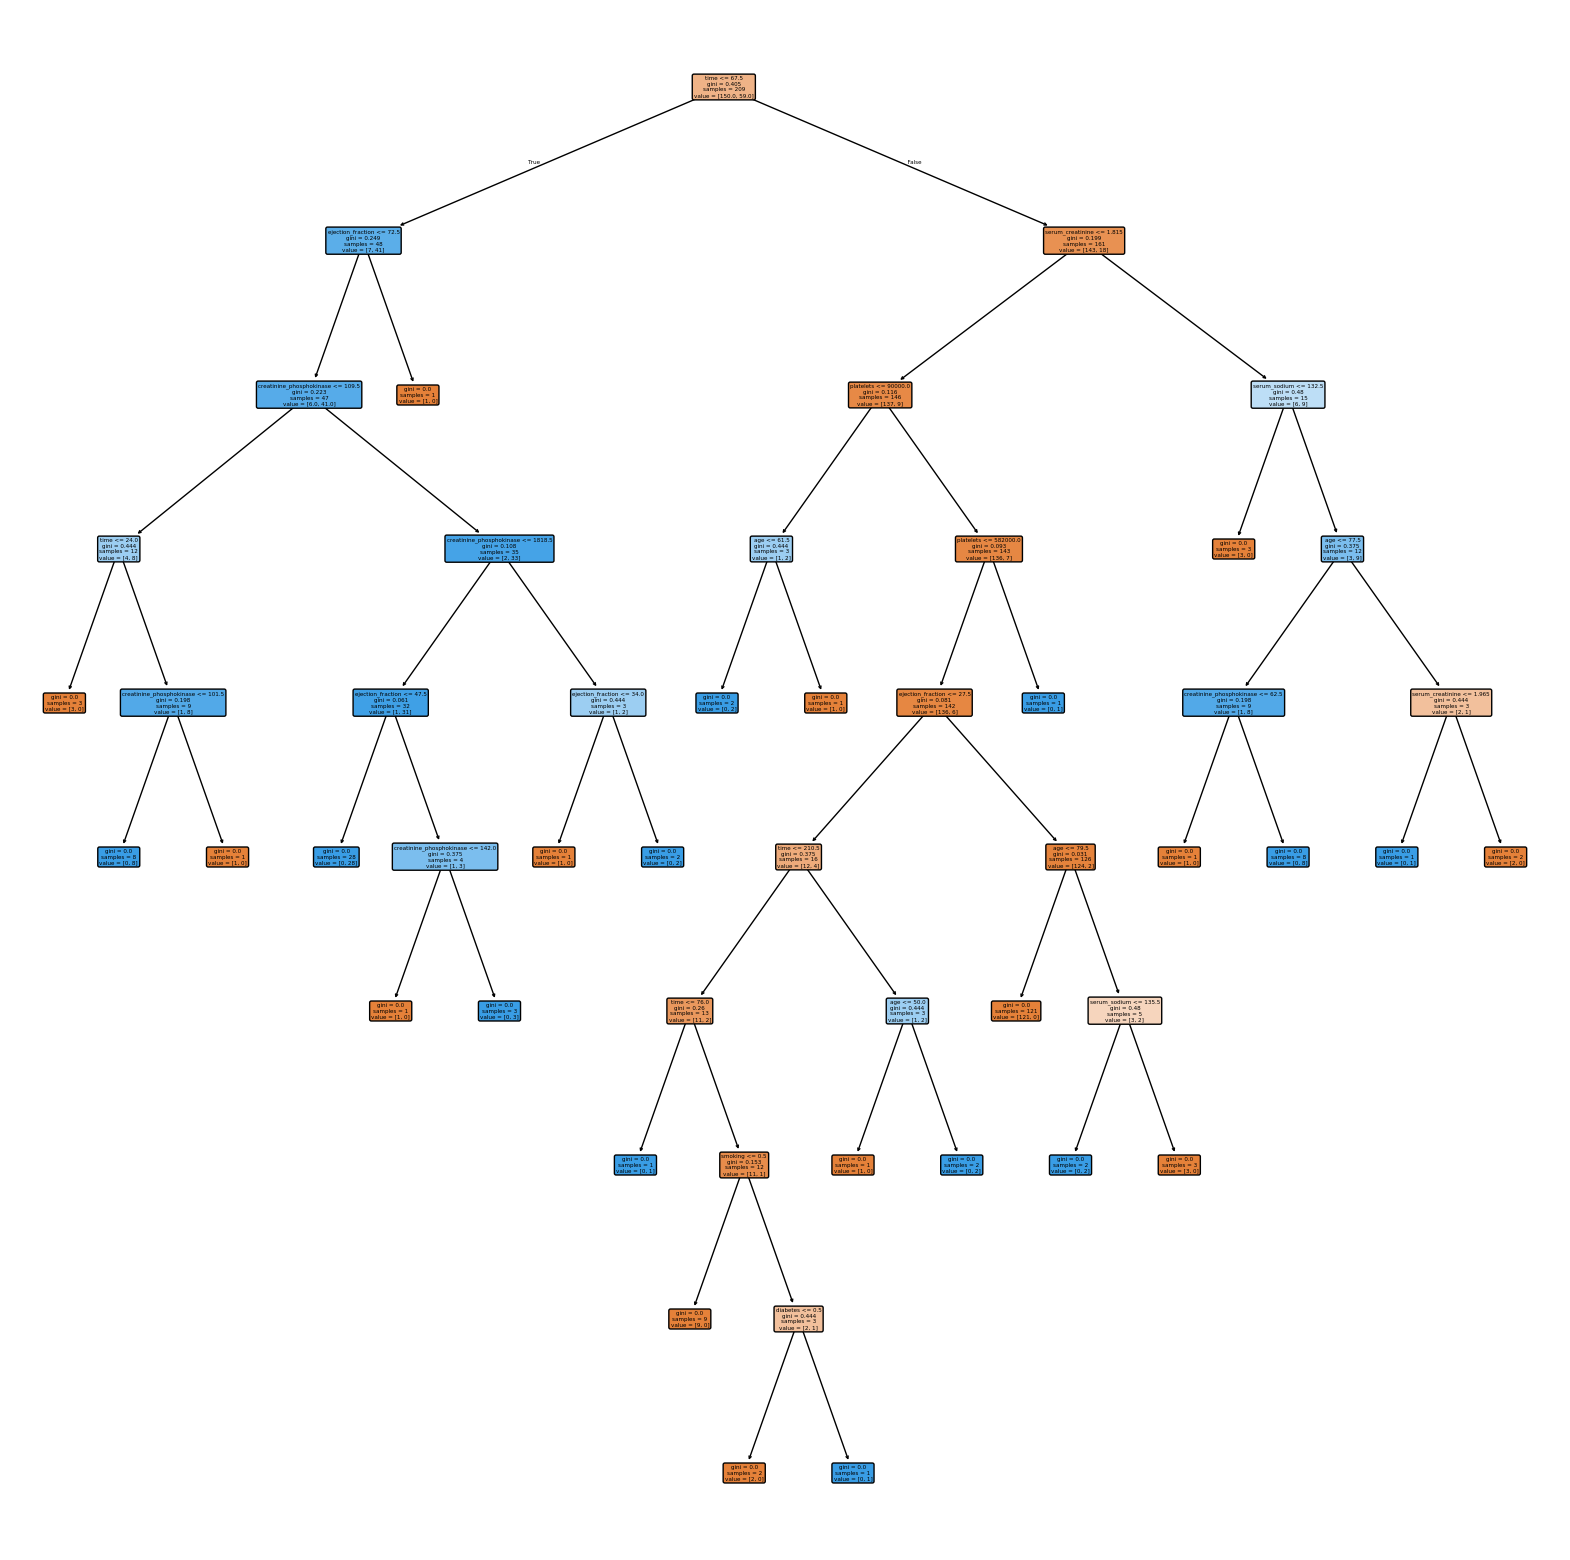

In [24]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt,filled=True,rounded=True,feature_names=x.columns)
plt.savefig("tree.png",dpi=1200)

In [25]:
pred=dt.predict(xtest)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0])

In [26]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# Confusion Matrix


In [27]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.73      0.81      0.77        53\n           1       0.68      0.57      0.62        37\n\n    accuracy                           0.71        90\n   macro avg       0.70      0.69      0.69        90\nweighted avg       0.71      0.71      0.71        90\n'

In [28]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        53
           1       0.68      0.57      0.62        37

    accuracy                           0.71        90
   macro avg       0.70      0.69      0.69        90
weighted avg       0.71      0.71      0.71        90



In [29]:
cm=confusion_matrix(ytest,pred)
cm

array([[43, 10],
       [16, 21]])

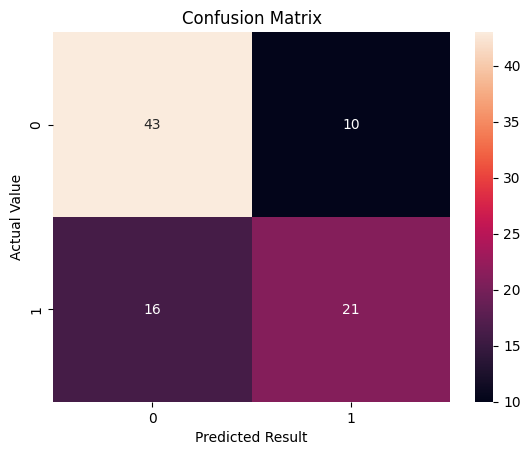

In [30]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix")
plt.savefig("Heatmap2.png")


In [31]:
tp,fn,fp,tn=confusion_matrix(ytest,pred).reshape(-1)

In [ ]:
print("True Positive : ",tp)
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)

True Positive :  43
True Negative :  21
False Positive :  16
False Negative :  10


In [32]:
accuracy_score(ytest,pred)

0.7111111111111111

In [33]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
accuracy

np.float64(0.7111111111111111)

In [34]:
precision = tp/(tp+fp)
precision

np.float64(0.7288135593220338)

In [35]:
from sklearn.metrics import RocCurveDisplay as pc #roc / auc = precision curve

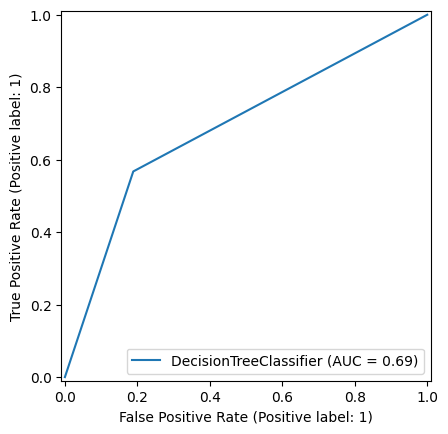

In [36]:
pc.from_estimator(dt, xtest, ytest)
plt.savefig("roc.png")

In [37]:
accuracy_score(ytest,pred)

0.7111111111111111

In [38]:
dt.score(xtest,ytest)

0.7111111111111111

# **Random Forest Classifiear**

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf=RandomForestClassifier()

In [41]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [42]:
rf.score(xtest,ytest)

0.7555555555555555

# **Random Search CV**

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
tree = np.random.randint(15,150,30) #15 theke 150 er modde 30 ta tree genarate korbe

In [45]:
tree

array([ 76,  17, 133, 133, 144, 134,  42,  20, 108,  19, 128,  37, 127,
       106,  15,  31,  19, 140,  21,  53,  62,  19, 124,  93,  30,  59,
        18,  71, 136, 105])

In [47]:
max_features= ['sqrt','log2']
max_depth = np.random.randint(2,12,50)
criterion = ["gini", "entropy"]
min_samples_split = [2, 3, 4]

grid = {
    'n_estimators': tree,
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

print(grid)

{'n_estimators': array([ 76,  17, 133, 133, 144, 134,  42,  20, 108,  19, 128,  37, 127,
       106,  15,  31,  19, 140,  21,  53,  62,  19, 124,  93,  30,  59,
        18,  71, 136, 105]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([10, 10,  5,  6,  2,  4,  2,  9, 10, 11,  6,  5,  9, 10,  6,  7,  8,
        6,  5, 11, 10, 10,  8,  8, 10,  9, 10,  4,  5, 11,  9,  9,  2,  3,
        6,  5,  7,  7,  3,  4,  4, 10,  4,  4,  4,  8, 11,  2,  5,  2]), 'min_samples_split': [2, 3, 4]}


In [49]:
rcv=RandomizedSearchCV(rf,grid,n_iter=150,cv=3)

In [50]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([10, 10,  5,  6,  2,  4,  2,  9, 10, 11,  6,  5,  9, 10,  6,  7,  8,
        6,  5, 11, 10, 10,  8,  8, 10,  9, 10,  4,  5, 11,  9,  9,  2,  3,
        6,  5,  7,  7,  3,  4,  4, 10,  4,  4,  4,  8, 11,  2,  5,  2]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([ 76,  17, 133, 133, 144, 134,  42,  20, 108,  19, 128,  37, 127,
       106,  15,  31,  19, 140,  21,  53,  62,  19, 124,  93,  30,  59,
        18,  71, 136, 105])})

In [51]:
rcv.cv_results_

{'mean_fit_time': array([0.24961495, 0.4164904 , 0.11286958, 0.30190571, 0.43309148,
        0.67081046, 0.19872316, 0.05093567, 0.1953454 , 0.06442126,
        0.05997213, 0.15576037, 0.11733071, 0.37589486, 0.05541515,
        0.4105862 , 0.19449202, 0.22552848, 0.0354255 , 0.14717825,
        0.02770376, 0.2058572 , 0.0649484 , 0.03126136, 0.17144179,
        0.03692214, 0.10947506, 0.22314588, 0.05862856, 0.05483373,
        0.23381066, 0.05298273, 0.29031237, 0.13042649, 0.16809543,
        0.20764128, 0.03089197, 0.09504422, 0.02807736, 0.20510991,
        0.0356373 , 0.21560756, 0.03637926, 0.18295042, 0.03729677,
        0.03524876, 0.03681207, 0.16088406, 0.19953863, 0.20071832,
        0.09744048, 0.0876569 , 0.20415918, 0.21897062, 0.11545833,
        0.11318946, 0.09350379, 0.21183364, 0.31073324, 0.35202877,
        0.28701647, 0.09032408, 0.09886948, 0.18987457, 0.03127098,
        0.20239568, 0.02877283, 0.19867325, 0.05017726, 0.20243915,
        0.05834317, 0.09291561,

In [52]:
tuning_result = pd.DataFrame(rcv.cv_results_)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.249615,0.041837,0.019278,0.003865,76,2,sqrt,10,gini,"{'n_estimators': 76, 'min_samples_split': 2, '...",0.814286,0.928571,0.869565,0.870807,0.046665,42
1,0.416490,0.036359,0.030994,0.005803,133,4,sqrt,10,entropy,"{'n_estimators': 133, 'min_samples_split': 4, ...",0.828571,0.957143,0.840580,0.875431,0.057986,34
2,0.112870,0.000707,0.012992,0.000336,42,3,log2,4,gini,"{'n_estimators': 42, 'min_samples_split': 3, '...",0.814286,0.971429,0.855072,0.880262,0.066580,13
3,0.301906,0.012218,0.029256,0.011265,105,4,sqrt,5,gini,"{'n_estimators': 105, 'min_samples_split': 4, ...",0.828571,0.942857,0.840580,0.870669,0.051279,57
4,0.433091,0.041576,0.055118,0.006909,136,2,sqrt,10,entropy,"{'n_estimators': 136, 'min_samples_split': 2, ...",0.800000,0.942857,0.855072,0.865977,0.058829,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.216930,0.008707,0.013627,0.000551,144,3,log2,3,entropy,"{'n_estimators': 144, 'min_samples_split': 3, ...",0.828571,0.957143,0.869565,0.885093,0.053625,4
146,0.096691,0.002536,0.008568,0.000349,62,2,log2,9,gini,"{'n_estimators': 62, 'min_samples_split': 2, '...",0.800000,0.942857,0.840580,0.861146,0.060107,98
147,0.138393,0.007824,0.010486,0.000493,93,3,log2,2,entropy,"{'n_estimators': 93, 'min_samples_split': 3, '...",0.814286,0.942857,0.869565,0.875569,0.052660,22
148,0.060251,0.003599,0.006702,0.000281,37,4,sqrt,8,gini,"{'n_estimators': 37, 'min_samples_split': 4, '...",0.814286,0.942857,0.869565,0.875569,0.052660,22


In [53]:
rcv.best_score_

np.float64(0.8898550724637682)

In [54]:
rcv.best_params_

{'n_estimators': np.int64(30),
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': np.int64(5),
 'criterion': 'gini'}

In [56]:
rcv2=rcv.best_estimator_

In [57]:
rcv2.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=np.int64(5), min_samples_split=3,
                       n_estimators=np.int64(30))

In [58]:
rcv2.score(xtest,ytest)

0.7555555555555555